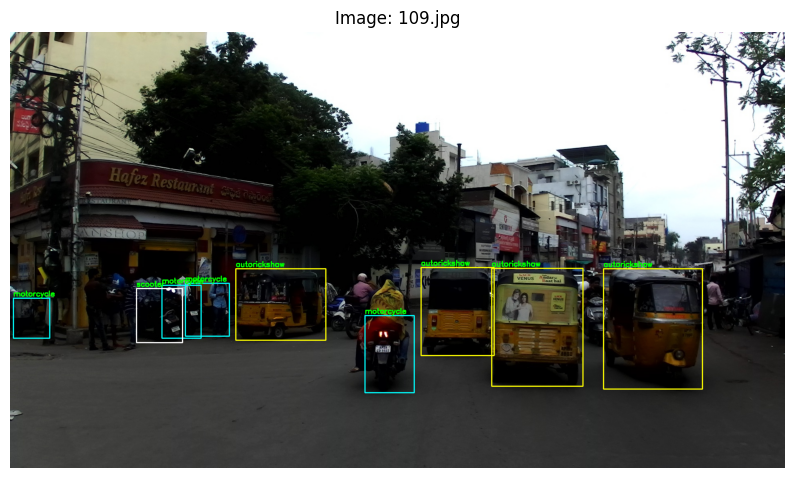

In [14]:
import os
import random
import xml.etree.ElementTree as ET
import cv2
import matplotlib.pyplot as plt

# Define paths
IMAGE_DIR = r"C:\Users\Sejal Hanmante\OneDrive\Desktop\idd detection\IDD_FGVD\train\images"
ANNOTATION_DIR = r"C:\Users\Sejal Hanmante\OneDrive\Desktop\idd detection\IDD_FGVD\train\annos"

# Get all image filenames (including .jpg, .jpeg, .png, case-insensitive)
image_filenames = [f for f in os.listdir(IMAGE_DIR) if f.lower().endswith((".jpg", ".jpeg", ".png"))]

# Check if any image files are found
if not image_filenames:
    print(f"⚠️ No image files found in the directory: {IMAGE_DIR}")
    exit()

# Choose a random image
random_image = random.choice(image_filenames)
image_path = os.path.join(IMAGE_DIR, random_image)
annotation_path = os.path.join(ANNOTATION_DIR, random_image.replace(".jpg", ".xml").replace(".jpeg", ".xml").replace(".png", ".xml"))

# Load image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Parse XML for annotations
tree = ET.parse(annotation_path)
root = tree.getroot()

# Define a color map for different classes
color_map = {
    "car": (255, 0, 0),       # Red
    "bus": (0, 255, 0), # Green
    "truck": (0, 0, 255),    # Blue
    "autorickshaw": (255, 255, 0),    # Cyan
    "mini-bus": (255, 165, 0),      # Orange
    "motorcycle" : (0,255,255)
}

# Draw bounding boxes
for obj in root.findall("object"):
    label = obj.find("name").text
    bbox = obj.find("bndbox")
    
    # Get bounding box coordinates as floats, then round them to integers
    xmin = int(round(float(bbox.find("xmin").text)))
    ymin = int(round(float(bbox.find("ymin").text)))
    xmax = int(round(float(bbox.find("xmax").text)))
    ymax = int(round(float(bbox.find("ymax").text)))

    # Get the color for this class label, default to white if not in color_map
    color = color_map.get(label, (255, 255, 255))  # White for unknown classes
    
    # Draw rectangle and label
    cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color=color, thickness=2)
    cv2.putText(image, label, (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX, 
                0.6, (0, 255, 0), 2)

# Show image
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.title(f"Image: {random_image}")
plt.axis("off")
plt.show()
